# 🍄 EDA – Aprendizaje No Supervisado con el Mushroom Dataset
## Exploratory Data Analysis (EDA)
**Autor:** Alfonso Bermúdez  
**Bootcamp IA – Proyecto Individual (2025)**

---

## 🏁 Introducción
En este notebook se lleva a cabo el **análisis exploratorio de datos (EDA)** sobre el *Mushroom Dataset* del repositorio de la UCI.

# URL del dataset original UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

El objetivo es comprender la estructura de los datos, identificar valores faltantes, preparar las variables categóricas y dejar el conjunto de datos listo para aplicar técnicas de **aprendizaje no supervisado (PCA + K-Means)** y un modelo **supervisado (Random Forest)** para comparación.


---

## Paso 1: Carga de librerías y dataset con renombrado de columnas

Comenzamos importando las librerías necesarias y cargando el *Mushroom Dataset* descargado del repositorio UCI en **`../data/agaricus-lepiota.data`** (nombre original UCI).

Renombramos y asignamos nombres oficiales de la especie de hongo a las columnas para evitar confusión cuando examinamos el datset.

Este dataset contiene 8124 instancias de hongos, cada una descrita por 22 atributos categóricos, y una variable objetivo `class` que indica si el hongo es **comestible (e)** o **venenoso (p)**.

In [1]:
import pandas as pd
import os

# Crear carpeta data si no existe
os.makedirs("../data", exist_ok=True)

DATA_PATH = '../data/agaricus-lepiota.data'
assert os.path.exists(DATA_PATH), f'No se encuentra {DATA_PATH}. Coloca el fichero original ahí.'
df = pd.read_csv(DATA_PATH, header=None)
df.head()

# URL del dataset original UCI
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

# Definir nombres de columnas
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring',
    'veil-type', 'veil-color', 'ring-number', 'ring-type',
    'spore-print-color', 'population', 'habitat'
]




# Leer y asignar nombres
df = pd.read_csv(DATA_PATH, header=None, names=columns)


# Guardar localmente
df.to_csv("../data/mushrooms.csv", index=False)

print("✅ Dataset descargado y guardado correctamente en 'data/mushrooms.csv'")
df.head()

✅ Dataset descargado y guardado correctamente en 'data/mushrooms.csv'


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Paso 2: Descripción inicial del dataset
A continuación, exploramos: Dimensiones, tipo de variables, valores únicos y si existen valores faltantes representados por 3l símbolo `'?'` por columna.

In [22]:
# Dimensiones del dataset
print(f"Número de filas: {df.shape[0]}, Número de columnas: {df.shape[1]}")

# Tipos de datos por columna
print('\nValores únicos por columna :')
print(df.nunique().sort_values().head(23))

# Conteo de valores faltantes representados por '?'
missing = (df == '?').sum().sort_values(ascending=False)
print('\nConteo de faltantes representados por ? por columna:')
print(missing[missing>0])



Número de filas: 8124, Número de columnas: 23

Valores únicos por columna :
veil-type                    1
class                        2
gill-attachment              2
gill-spacing                 2
stalk-shape                  2
gill-size                    2
bruises                      2
ring-number                  3
stalk-surface-above-ring     4
veil-color                   4
cap-surface                  4
stalk-surface-below-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
odor                         9
stalk-color-above-ring       9
stalk-color-below-ring       9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

Conteo de faltantes representados por ? por columna:
stalk-root    2480
dtype: int64


## 🧼 Paso 3: Estrategias para `stalk-root`
Comparamos: (1) eliminar filas, (2) imputar moda, (3) eliminar columna. Visualizamos el impacto en la distribución de `class`.


Tamaños:
original: (8124, 23) | drop_rows: (5644, 23) | impute_mode: (8124, 23) | drop_col: (8124, 22)


C:\Users\alfbb\AppData\Local\Temp\ipykernel_4132\398162973.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_drop_rows, palette='Set2', ax=axes[0]); axes[0].set_title('Eliminar filas con ?');
C:\Users\alfbb\AppData\Local\Temp\ipykernel_4132\398162973.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_impute, palette='Set2', ax=axes[1]); axes[1].set_title('Imputar moda');
C:\Users\alfbb\AppData\Local\Temp\ipykernel_4132\398162973.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', d

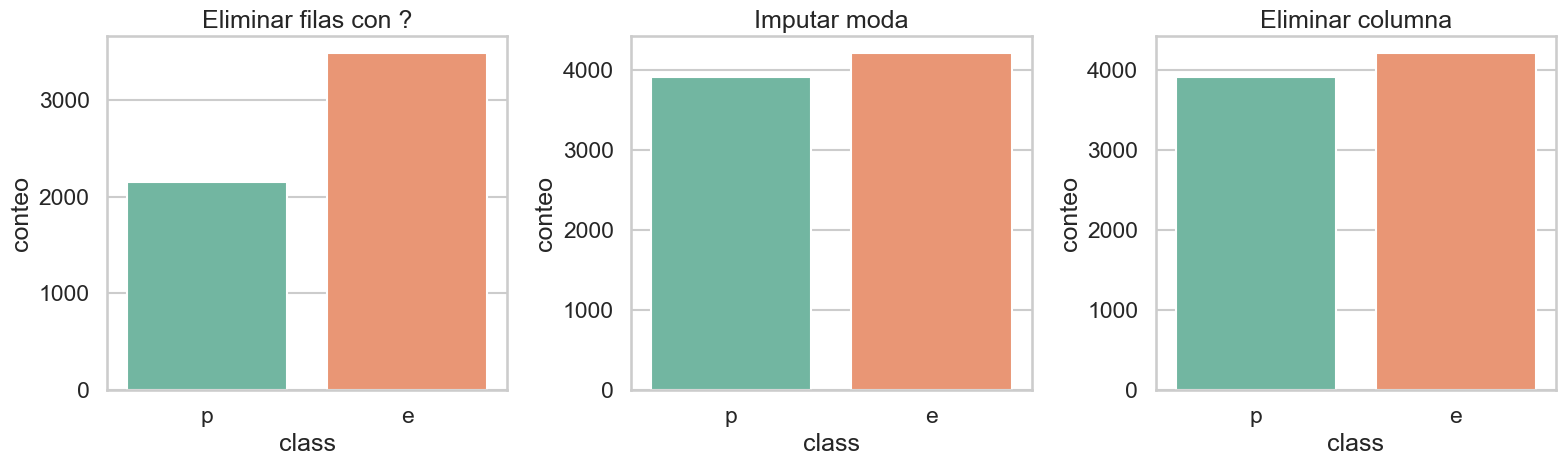

In [23]:
import seaborn as sns, matplotlib.pyplot as plt
sns.set_theme(style='whitegrid', context='talk')

df_drop_rows = df[df['stalk-root'] != '?'].copy()
df_impute = df.copy()
df_impute['stalk-root'] = df_impute['stalk-root'].replace('?', np.nan)
mode_val = df_impute['stalk-root'].mode()[0]
df_impute['stalk-root'] = df_impute['stalk-root'].fillna(mode_val)
df_drop_col = df.drop(columns=['stalk-root']).copy()

print('Tamaños:')
print('original:', df.shape, '| drop_rows:', df_drop_rows.shape, '| impute_mode:', df_impute.shape, '| drop_col:', df_drop_col.shape)

fig, axes = plt.subplots(1,3, figsize=(16,5))
sns.countplot(x='class', data=df_drop_rows, palette='Set2', ax=axes[0]); axes[0].set_title('Eliminar filas con ?');
sns.countplot(x='class', data=df_impute, palette='Set2', ax=axes[1]); axes[1].set_title('Imputar moda');
sns.countplot(x='class', data=df_drop_col, palette='Set2', ax=axes[2]); axes[2].set_title('Eliminar columna');
for ax in axes:
    ax.set_xlabel('class'); ax.set_ylabel('conteo')
plt.tight_layout(); plt.show()

### ✅ Decisión
La **imputación por moda** conserva el tamaño del dataset y mantiene el equilibrio de clases. Usaremos esta opción para el pipeline posterior. 
Creamos `df_clean` y retiramos columnas constantes (p. ej., `veil-type`).

In [ ]:
df_clean = df_impute.copy()
constant_cols = [c for c in df_clean.columns if df_clean[c].nunique() == 1]
df_clean = df_clean.drop(columns=constant_cols) if constant_cols else df_clean
constant_cols

### 🧼 Paso 2: Tratamiento de valores faltantes (`stalk-root`)
La variable `stalk-root` presenta un número considerable de valores `'?'`, lo que indica valores faltantes. Existen varias estrategias posibles:
1. Eliminar las filas que contienen `'?'`.
2. Reemplazar por NaN e imputar con la moda.
3. Eliminar la columna si su aporte es mínimo.

Probamos la imputación con la moda para preservar la mayor cantidad de información posible.

In [24]:
df['stalk-root'] = df['stalk-root'].replace('?', np.nan)
df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)
df.isna().sum().any()

C:\Users\alfbb\AppData\Local\Temp\ipykernel_4132\3212048926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)


np.False_

### 📊 Paso 3: Análisis exploratorio básico
Revisamos la distribución de la variable objetivo (`class`) y otras variables relevantes para entender el balance de clases y posibles relaciones entre atributos.

C:\Users\alfbb\AppData\Local\Temp\ipykernel_4132\2446594816.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


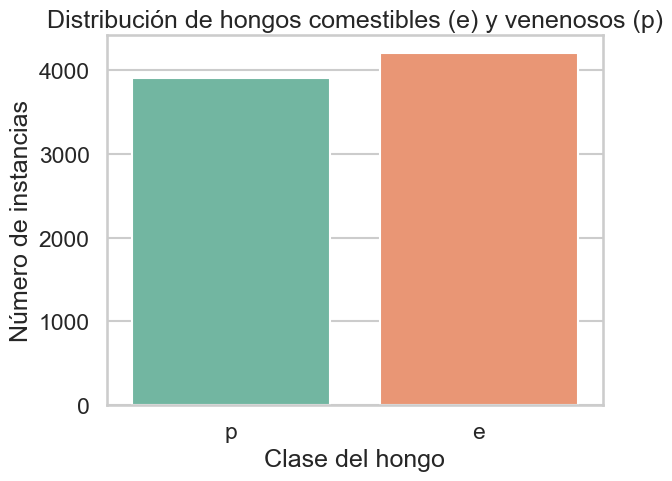

In [4]:
sns.countplot(x='class', data=df, palette='Set2')
plt.title('Distribución de hongos comestibles (e) y venenosos (p)')
plt.xlabel('Clase del hongo')
plt.ylabel('Número de instancias')
plt.show()

### 🧩 Paso 4: Codificación de variables categóricas (One-Hot Encoding)
Dado que todas las variables del dataset son categóricas, aplicamos `OneHotEncoder` para convertirlas en variables numéricas. Posteriormente, separamos las variables predictoras (`X`) de la variable objetivo (`y`).

In [5]:
X = df.drop('class', axis=1)
y = df['class']
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.columns))
print(f"Tamaño del dataset tras la codificación: {X_encoded.shape}")
X_encoded.head()

Tamaño del dataset tras la codificación: (8124, 116)


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
